# DATA SOURCE FROM ELSEWHERE

Source: Beyond fitness tracking: The use of consumer-grade wearable data from normal volunteers in cardiovascular and lipidomics research, Weng et al, Feb 2018. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5828350/#!po=68.5897

This study collect data from 233 subjects and investigated health indicators like RHR and the relationship with disease markers like blood pressure, etc. Subjects are required to wear the tracker for 5 days. Thus data are over 5 days only.

Can make use of the data collected for analysis and model building.

In [1]:
import pandas as pd
import os
import numpy as np
import datetime as dt

import seaborn as sns # use for visualising
import matplotlib.pyplot as plt
from scipy import stats as sps

### Inspecting the Data Files

Heart Rate File (For single person):

In [2]:
current_directory = os.getcwd()
folder_path = os.path.join(current_directory,'Beyond fitness tracking, Weng et al, 2018 Feb 27','Raw_Data','Activity_Data')
file_path = 'HRTable_1015-0035-NHC.tsv'

df = pd.read_table(os.path.join(folder_path,file_path))
df


,ResearchID,BiobankID,Time,BPM,Confidence,CaloriesBurned,DefaultZone,CustomZone
0,SH-NHC-0280,1015-0035/NHC,2017-03-02 00:00:00,0,-1,6.024,NaN,NaN
1,SH-NHC-0280,1015-0035/NHC,2017-03-02 00:05:00,0,-1,6.024,NaN,NaN
2,SH-NHC-0280,1015-0035/NHC,2017-03-02 00:10:00,0,-1,6.024,NaN,NaN
3,SH-NHC-0280,1015-0035/NHC,2017-03-02 00:15:00,0,-1,6.024,NaN,NaN
4,SH-NHC-0280,1015-0035/NHC,2017-03-02 00:20:00,0,-1,6.024,NaN,NaN
...,...,...,...,...,...,...,...,...
1428,SH-NHC-0280,1015-0035/NHC,2017-03-06 23:35:00,0,-1,6.024,NaN,NaN
1429,SH-NHC-0280,1015-0035/NHC,2017-03-06 23:40:00,0,-1,6.024,NaN,NaN
1430,SH-NHC-0280,1015-0035/NHC,2017-03-06 23:45:00,0,-1,6.024,NaN,NaN
1431,SH-NHC-0280,1015-0035/NHC,2017-03-06 23:50:00,0,-1,6.024,NaN,NaN


In [3]:
# Create Date Column
df['date'] = df['Time'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())

# calculate daily Calorie values
df.groupby('date')['CaloriesBurned'].sum()

date
2017-03-02    2511.64656
2017-03-03    2435.14176
2017-03-04    2374.05840
2017-03-05    2029.60608
2017-03-06    2645.13840
Name: CaloriesBurned, dtype: float64

date
2017-03-02    AxesSubplot(0.125,0.125;0.775x0.755)
2017-03-03    AxesSubplot(0.125,0.125;0.775x0.755)
2017-03-04    AxesSubplot(0.125,0.125;0.775x0.755)
2017-03-05    AxesSubplot(0.125,0.125;0.775x0.755)
2017-03-06    AxesSubplot(0.125,0.125;0.775x0.755)
Name: BPM, dtype: object

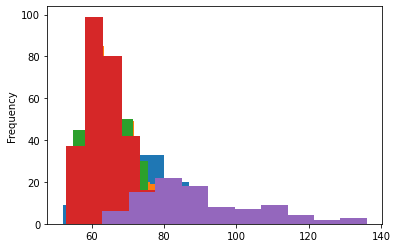

In [4]:
df_nonZero_bpm = df[['date','BPM']].replace(0, np.NaN).dropna() # replace zero with Nan values and drop as test subjects did not wear tracker.

xx = df_nonZero_bpm.groupby('date')['BPM'] # get Average

xx.plot(kind='hist')



In [5]:
df_nonZero_bpm = df[['date','BPM']].replace(0, np.NaN).dropna() # replace zero with Nan values and drop as test subjects did not wear tracker.

xx_HeartRate = pd.concat([df_nonZero_bpm.groupby('date')['BPM'].mean(), # get Average
                       df_nonZero_bpm.groupby('date')['BPM'].apply(np.std), # get Standard Deviation
                       df_nonZero_bpm.groupby('date')['BPM'].max(),
                       df_nonZero_bpm.groupby('date')['BPM'].min()],axis=1)

xx_HeartRate.columns = ['BPM_ave','BPM_sd','BPM_max','BPM_min']
xx_HeartRate['BPM_range'] = xx_HeartRate.BPM_max - xx_HeartRate.BPM_min

xx_HeartRate

,BPM_ave,BPM_sd,BPM_max,BPM_min,BPM_range
date,,,,,
2017-03-02,71.816327,11.089629,122.0,52.0,70.0
2017-03-03,66.690141,6.996662,97.0,55.0,42.0
2017-03-04,66.951220,7.880934,96.0,55.0,41.0
2017-03-05,65.056140,7.061410,104.0,53.0,51.0
2017-03-06,89.978723,16.425187,136.0,63.0,73.0


DailyTable File:

In [6]:
current_directory = os.getcwd()
folder_path = os.path.join(current_directory,'Beyond fitness tracking, Weng et al, 2018 Feb 27','Raw_Data','Activity_Data')
file_path = 'DailyTable_0115-0050-NHC.tsv'

df_steps = pd.read_table(os.path.join(folder_path,file_path))
df_steps

,ResearchID,BiobankID,Time,Steps,Distance,Floors,MinutesVeryActive,CalBurned,CalIntake
0,SH-NHC-0020,0115-0050/NHC,2015-12-22,2154,1.36268,4,18,1593,0
1,SH-NHC-0020,0115-0050/NHC,2015-12-23,3868,2.44093,2,0,1985,0
2,SH-NHC-0020,0115-0050/NHC,2015-12-24,10266,6.47810,2,31,2524,0
3,SH-NHC-0020,0115-0050/NHC,2015-12-25,5176,3.26629,4,33,2739,0
4,SH-NHC-0020,0115-0050/NHC,2015-12-26,23,0.01452,0,0,1391,0
5,SH-NHC-0020,0115-0050/NHC,2015-12-27,10,0.00631,0,0,1369,0
6,SH-NHC-0020,0115-0050/NHC,2015-12-28,1668,1.05254,14,6,1530,0


MainTable File (per 5 minutes):

In [7]:
current_directory = os.getcwd()
folder_path = os.path.join(current_directory,'Beyond fitness tracking, Weng et al, 2018 Feb 27','Raw_Data','Activity_Data')
file_path = 'MainTable_0115-0050-NHC.tsv'

# f = open(os.path.join(folder_path,file_path), 'r')
# print(f.read())

df = pd.read_table(os.path.join(folder_path,file_path))
df

,ResearchID,BiobankID,Time,Steps,Distance,Floors,ActiveMinutes,CaloriesBurned,ActivityLevel
0,SH-NHC-0020,0115-0050/NHC,2015-12-22 00:00:00,0,0.0,0,0,14.2125,SEDENTARY
1,SH-NHC-0020,0115-0050/NHC,2015-12-22 00:15:00,0,0.0,0,0,14.2125,SEDENTARY
2,SH-NHC-0020,0115-0050/NHC,2015-12-22 00:30:00,0,0.0,0,0,14.2125,SEDENTARY
3,SH-NHC-0020,0115-0050/NHC,2015-12-22 00:45:00,0,0.0,0,0,14.2125,SEDENTARY
4,SH-NHC-0020,0115-0050/NHC,2015-12-22 01:00:00,0,0.0,0,0,14.2125,SEDENTARY
...,...,...,...,...,...,...,...,...,...
667,SH-NHC-0020,0115-0050/NHC,2015-12-28 22:45:00,0,0.0,0,0,14.2125,SEDENTARY
668,SH-NHC-0020,0115-0050/NHC,2015-12-28 23:00:00,0,0.0,0,0,14.2125,SEDENTARY
669,SH-NHC-0020,0115-0050/NHC,2015-12-28 23:15:00,0,0.0,0,0,14.2125,SEDENTARY
670,SH-NHC-0020,0115-0050/NHC,2015-12-28 23:30:00,0,0.0,0,0,14.2125,SEDENTARY


Sleep Table (Only have Duration, no Efficiency):

In [8]:
current_directory = os.getcwd()
folder_path = os.path.join(current_directory,'Beyond fitness tracking, Weng et al, 2018 Feb 27','Raw_Data','Activity_Data')
file_path = 'Consolidated_SleepDetailed.tsv'

# f = open(os.path.join(folder_path,file_path), 'r')
# print(f.read())

df = pd.read_table(os.path.join(folder_path,file_path),header=None)
df.columns = ['ResearchID','BiobankID','date','startTime','endTime','sleepDuration','startDateTime','endDateTime']

df[df.BiobankID == '0115-0050/NHC' ] # Durations in minutes!

,ResearchID,BiobankID,date,startTime,endTime,sleepDuration,startDateTime,endDateTime
0,SH-NHC-0020,0115-0050/NHC,2015-12-24,3:24,4:56,92,2015-12-24 03:24:00,2015-12-24 04:56:30
1,SH-NHC-0020,0115-0050/NHC,2015-12-25,23:22,0:51,88,2015-12-24 23:22:30,2015-12-25 00:51:00
2,SH-NHC-0020,0115-0050/NHC,2015-12-24,23:27,3:22,235,2015-12-23 23:27:30,2015-12-24 03:22:30
3,SH-NHC-0020,0115-0050/NHC,2015-12-26,23:28,5:08,340,2015-12-25 23:28:30,2015-12-26 05:08:30
4,SH-NHC-0020,0115-0050/NHC,2015-12-23,11:35,3:36,960,2015-12-22 11:35:47,2015-12-23 03:36:00
5,SH-NHC-0020,0115-0050/NHC,2015-12-25,1:02,6:27,325,2015-12-25 01:02:30,2015-12-25 06:27:30
6,SH-NHC-0020,0115-0050/NHC,2015-12-24,7:12,8:16,64,2015-12-24 07:12:30,2015-12-24 08:16:30


PhenoTable Text File:

In [9]:
current_directory = os.getcwd()
folder_path = os.path.join(current_directory,'Beyond fitness tracking, Weng et al, 2018 Feb 27','Raw_Data')
file_path = 'Pheno_Table.txt'

df_profiles = pd.read_table(os.path.join(folder_path,file_path))

# Process Column Name:
df_profiles.columns = [str(x).replace('.','_') for x in df_profiles.columns]

# Set Index to Research ID
df_profiles.set_index('Research_ID',inplace=True)

df_profiles

,Race_x,Gender,Age_x,Smoking_Hx,Smoking_Packs,Smoking_Duration,Job_Type,Last_Week_Hrs_Spent_On_Physical_Exercise,Last_Week_Hrs_Spent_On_Cycling,Last_Week_Hrs_Spent_On_Walking,...,DBP,ECG_HR,Height,Weight,BMI,HDL,LDL,TotalChol,Triglycerides,Glucose
Research_ID,,,,,,,,,,,,,,,,,,,,,
0115-0050-NHC,MY,M,65,Yes,1.0,35,Not employed,None,None,None,...,81.0,70.0,1.62,74.2,28.273129,1.16,5.77,7.98,2.32,5.7
0115-0066-NHC,CN,M,48,No,NaN,NaN,Sedentary job,1 hour but less than 3 hours,None,1 hour but less than 3 hours,...,82.0,76.0,1.63,64.0,24.088223,1.28,3.01,4.75,1.01,5.2
0115-0070-NHC,CN,F,51,No,NaN,NaN,Sedentary job,1 hour but less than 3 hours,None,Some but less than 1 hour,...,73.0,60.0,1.62,54.8,20.880963,1.54,4.60,6.60,1.02,5.3
0115-0074-NHC,CN,F,41,No,NaN,NaN,Sedentary job,1 hour but less than 3 hours,None,None,...,89.0,76.0,1.72,67.0,22.647377,1.43,3.74,5.71,1.20,6.1
0115-0075-NHC,CN,M,50,No,NaN,NaN,Active job,Some but less than 1 hour,3 hours or more,1 hour but less than 3 hours,...,76.0,54.0,1.81,85.5,26.098104,1.13,3.17,4.75,0.99,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216-0033-NHC,CN,F,48,No,NaN,NaN,Sedentary job,None,None,Some but less than 1 hour,...,72.0,65.0,1.60,54.1,21.130000,1.84,2.99,5.09,0.58,5.3
1216-0064-NHC,CN,F,60,No,NaN,NaN,Active job,Some but less than 1 hour,Some but less than 1 hour,1 hour but less than 3 hours,...,83.0,65.0,1.45,43.5,20.690000,1.66,3.93,6.13,1.18,4.7
1216-0070-NHC,CN,F,54,No,NaN,NaN,Sedentary job,Some but less than 1 hour,1 hour but less than 3 hours,3 hours or more,...,75.0,52.0,1.49,59.4,26.760000,1.17,3.45,5.00,0.83,5.4


Column info for Profile (Consist of almost all the data):

In [10]:
df_profiles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 0115-0050-NHC to 1216-0079-NHC
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Race_x                                    233 non-null    object 
 1   Gender                                    233 non-null    object 
 2   Age_x                                     233 non-null    int64  
 3   Smoking_Hx                                233 non-null    object 
 4   Smoking_Packs                             21 non-null     float64
 5   Smoking_Duration                          21 non-null     object 
 6   Job_Type                                  233 non-null    object 
 7   Last_Week_Hrs_Spent_On_Physical_Exercise  233 non-null    object 
 8   Last_Week_Hrs_Spent_On_Cycling            233 non-null    object 
 9   Last_Week_Hrs_Spent_On_Walking            233 non-null    object 
 10  Last_Week_Hrs_Spent_O

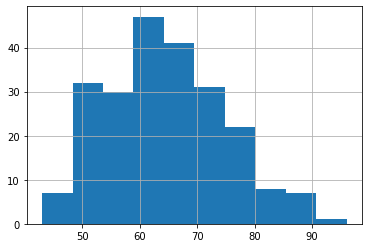

In [11]:
df_profiles['ECG_HR'].hist()

The above shows the clinically taken ECG values, presumably with little activity.

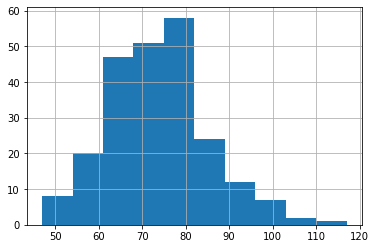

In [12]:
df_profiles['Pulse_Rate'].hist()

The above shows the average pulse rate values, presumabily from the fitness tracker.

In [13]:
df_profiles['MH_Hypertension'][df_profiles['MH_Hypertension'] == 'Yes']

Research_ID
0116-0033-NHC    Yes
0216-0003-NHC    Yes
0216-0051-NHC    Yes
0217-0026-NHC    Yes
0415-0001-NHC    Yes
0516-0040-NHC    Yes
0715-0054-NHC    Yes
0716-0004-NHC    Yes
1015-0076-NHC    Yes
Name: MH_Hypertension, dtype: object

### Selecting Useful Information

This file ('Pheno_Table.txt') would be most useful as it contains all the summarised details. Columns are further selected.

In [14]:
col = ['Gender','Age_x','BMI', # Labels
       'Smoking_Hx','Smoking_Packs','Smoking_Duration', # Smoker Info
       'MH_Diabetes_Mellitus','MH_Hypertension','MH_Hyperlipidemia','MH_Cancer', # Existing illness info
       'Sleep_Hours', # Average Sleeping Hours
       'Pulse_Rate', # Health tracker stats
       'SBP','DBP', # Blood Pressure Info
       'HDL','LDL','TotalChol','Triglycerides','Glucose' # Cholestrol / Lipid Info
      ]

# include steps later

df_profiles_select = df_profiles[col]

In [15]:
df_profiles_select.loc['1015-0035-NHC']

Gender                     M
Age_x                     39
BMI                     28.9
Smoking_Hx                No
Smoking_Packs            NaN
Smoking_Duration         NaN
MH_Diabetes_Mellitus      No
MH_Hypertension           No
MH_Hyperlipidemia         No
MH_Cancer                 No
Sleep_Hours                6
Pulse_Rate                76
SBP                      138
DBP                       64
HDL                     1.29
LDL                     4.13
TotalChol                5.7
Triglycerides           0.62
Glucose                  5.1
Name: 1015-0035-NHC, dtype: object

<b>NOTES:</b>

<b>Blood Pressure Terms</b>
- Systolic and Diastolic Blood Pressure (SDP and DBP)

<b>Lipid/Cholestrol Terms</b>
- High and Low Density Lipoprotein, Good and Bad Cholestrols (HDL and LDL)
- Fat Cells (Triglycerides)
- Total Cholestrol (TotalChol)

As compared to xx_HeartRate Dataframe processed previously for subject "1015-0035-NHC" (Shown below cell), the "Pulse Rate does seems to be the average values. But, maybe the treatment for Nan values was not by dropping and instead was replaced by mean or interpolated values of the 5 days (not stated):

In [16]:
xx_HeartRate.BPM_ave.mean()

72.09851012860206

Adding Steps info:

In [17]:
# list of files for Iteration:

current_directory = os.getcwd()
folder_path = os.path.join(current_directory,'Beyond fitness tracking, Weng et al, 2018 Feb 27','Raw_Data','Activity_Data')

list_of_file = [x for x in os.listdir(folder_path) if "DailyTable" in x]
len(list_of_file)

233

In [18]:
step_df_list = []

for f_name in list_of_file:
    step_df = pd.read_table(os.path.join(folder_path,f_name))[['BiobankID','Steps']] # Read into pandas
    step_df['BiobankID'] = step_df.BiobankID.apply(lambda x : str(x).replace('/','-')) # Renaming subject ID to follow the convention in Pheno_Table
#     step_df = step_df.rename(columns={'BiobankID':'Research_ID'}) # Rename ID column
    step_df_list.append(step_df.groupby('BiobankID').mean()) # append mean step count

combined_df = pd.concat(step_df_list)
combined_df

,Steps
BiobankID,
0115-0050-NHC,3309.285714
0115-0066-NHC,11065.750000
0115-0070-NHC,4659.285714
0115-0074-NHC,9417.000000
0115-0075-NHC,9307.285714
...,...
1216-0033-NHC,8914.222222
1216-0064-NHC,15001.833333
1216-0070-NHC,6954.000000


In [19]:
# Merging the steps df into the profiles df (after selected columns):

df_profiles_final = df_profiles_select.merge(combined_df,on=df_profiles.index,)
df_profiles_final = df_profiles_final.set_index('key_0')
df_profiles_final

,Gender,Age_x,BMI,Smoking_Hx,Smoking_Packs,Smoking_Duration,MH_Diabetes_Mellitus,MH_Hypertension,MH_Hyperlipidemia,MH_Cancer,Sleep_Hours,Pulse_Rate,SBP,DBP,HDL,LDL,TotalChol,Triglycerides,Glucose,Steps
key_0,,,,,,,,,,,,,,,,,,,,
0115-0050-NHC,M,65,28.273129,Yes,1.0,35,No,No,No,No,5.0,82.0,117,81.0,1.16,5.77,7.98,2.32,5.7,3309.285714
0115-0066-NHC,M,48,24.088223,No,NaN,NaN,No,No,No,No,5.0,78.0,127,82.0,1.28,3.01,4.75,1.01,5.2,11065.750000
0115-0070-NHC,F,51,20.880963,No,NaN,NaN,NaN,NaN,NaN,NaN,8.0,66.0,115,73.0,1.54,4.60,6.60,1.02,5.3,4659.285714
0115-0074-NHC,F,41,22.647377,No,NaN,NaN,No,Unknown,No,No,6.0,67.0,135,89.0,1.43,3.74,5.71,1.20,6.1,9417.000000
0115-0075-NHC,M,50,26.098104,No,NaN,NaN,No,No,No,No,8.0,65.0,129,76.0,1.13,3.17,4.75,0.99,5.1,9307.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216-0033-NHC,F,48,21.130000,No,NaN,NaN,No,No,No,No,6.0,83.0,147,72.0,1.84,2.99,5.09,0.58,5.3,8914.222222
1216-0064-NHC,F,60,20.690000,No,NaN,NaN,No,No,No,No,7.0,77.0,135,83.0,1.66,3.93,6.13,1.18,4.7,15001.833333
1216-0070-NHC,F,54,26.760000,No,NaN,NaN,No,No,No,No,6.0,59.0,127,75.0,1.17,3.45,5.00,0.83,5.4,6954.000000


### Processing the Datatypes and Nan values

In [20]:
df_profiles_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 0115-0050-NHC to 1216-0079-NHC
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                233 non-null    object 
 1   Age_x                 233 non-null    int64  
 2   BMI                   233 non-null    float64
 3   Smoking_Hx            233 non-null    object 
 4   Smoking_Packs         21 non-null     float64
 5   Smoking_Duration      21 non-null     object 
 6   MH_Diabetes_Mellitus  226 non-null    object 
 7   MH_Hypertension       226 non-null    object 
 8   MH_Hyperlipidemia     226 non-null    object 
 9   MH_Cancer             226 non-null    object 
 10  Sleep_Hours           230 non-null    float64
 11  Pulse_Rate            230 non-null    float64
 12  SBP                   233 non-null    int64  
 13  DBP                   232 non-null    float64
 14  HDL                   233 non-null    float64
 15  LDL   

In [21]:
# Fill in Zero for non-Smokers:
df_profiles_final[['Smoking_Packs','Smoking_Duration']] = df_profiles_final[['Smoking_Packs','Smoking_Duration']].fillna(0)

# Filling in "Unknown for Existing - Illness"
col = ['MH_Diabetes_Mellitus','MH_Hypertension','MH_Hyperlipidemia','MH_Cancer']
df_profiles_final[col] = df_profiles_final[col].fillna('Unknown')

# Changing all Object Dtype Columns into Catagories Dtype:
for col in df_profiles_final.columns:
    if df_profiles_final[col].dtype == 'object':
        df_profiles_final[col] = pd.Categorical(df_profiles_final[col])
        
        
df_profiles_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 0115-0050-NHC to 1216-0079-NHC
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Gender                233 non-null    category
 1   Age_x                 233 non-null    int64   
 2   BMI                   233 non-null    float64 
 3   Smoking_Hx            233 non-null    category
 4   Smoking_Packs         233 non-null    float64 
 5   Smoking_Duration      233 non-null    category
 6   MH_Diabetes_Mellitus  233 non-null    category
 7   MH_Hypertension       233 non-null    category
 8   MH_Hyperlipidemia     233 non-null    category
 9   MH_Cancer             233 non-null    category
 10  Sleep_Hours           230 non-null    float64 
 11  Pulse_Rate            230 non-null    float64 
 12  SBP                   233 non-null    int64   
 13  DBP                   232 non-null    float64 
 14  HDL                   233 non-null    flo

In [22]:
col = [x for x in df_profiles_final.columns if df_profiles_final[x].isna().any()] # find columns with missing records

# Fill in with mean values:
for c in col:
    df_profiles_final[c] = df_profiles_final[c].fillna(df_profiles_final[c].mean())

df_profiles_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 0115-0050-NHC to 1216-0079-NHC
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Gender                233 non-null    category
 1   Age_x                 233 non-null    int64   
 2   BMI                   233 non-null    float64 
 3   Smoking_Hx            233 non-null    category
 4   Smoking_Packs         233 non-null    float64 
 5   Smoking_Duration      233 non-null    category
 6   MH_Diabetes_Mellitus  233 non-null    category
 7   MH_Hypertension       233 non-null    category
 8   MH_Hyperlipidemia     233 non-null    category
 9   MH_Cancer             233 non-null    category
 10  Sleep_Hours           233 non-null    float64 
 11  Pulse_Rate            233 non-null    float64 
 12  SBP                   233 non-null    int64   
 13  DBP                   233 non-null    float64 
 14  HDL                   233 non-null    flo

## View Data Distribution

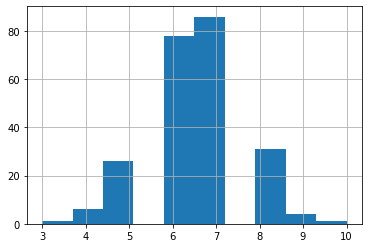

In [39]:
df_profiles_final.Sleep_Hours.hist()

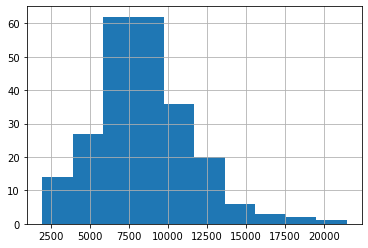

In [41]:
df_profiles_final.Steps.hist()

### Analysis of Correlation

In [30]:
# Specifying Column names for eaier reference:

Generic_col = ['Gender','Age_x','BMI','Smoking_Hx'] # Generic Info
Smoker_col = ['Smoking_Packs','Smoking_Duration'] # Smoker info
Illness_col = ['MH_Diabetes_Mellitus','MH_Hypertension','MH_Hyperlipidemia','MH_Cancer'] # Existing illness info
Tracker_col = ['Sleep_Hours','Pulse_Rate','Steps'] # Health tracker stats
BP_col = ['SBP','DBP'] # Blood Pressure Info
Cholestrol_col = ['HDL','LDL','TotalChol','Triglycerides','Glucose'] # Cholestrol / Lipid Info

In [31]:
for illness in Illness_col:
    print(illness+'\n')
    print(df_profiles_final[illness].value_counts(),'\n')

MH_Diabetes_Mellitus

No         222
Unknown     10
Yes          1
Name: MH_Diabetes_Mellitus, dtype: int64 

MH_Hypertension

No         213
Unknown     11
Yes          9
Name: MH_Hypertension, dtype: int64 

MH_Hyperlipidemia

No         216
Unknown     12
Yes          5
Name: MH_Hyperlipidemia, dtype: int64 

MH_Cancer

No         224
Unknown      8
Yes          1
Name: MH_Cancer, dtype: int64 



In [32]:
df_profiles_final.loc[np.sum(df_profiles_final[Illness_col] == "Yes",axis=1)>1][Illness_col]

,MH_Diabetes_Mellitus,MH_Hypertension,MH_Hyperlipidemia,MH_Cancer
key_0,,,,
0715-0054-NHC,Yes,Yes,No,No


As shown from above, the samples is not enough to represent to classify people who got these illness.

In [34]:
condition = (df_profiles_final.MH_Hyperlipidemia == 'Yes')|(df_profiles_final.MH_Hypertension == 'Yes')|(df_profiles_final.MH_Diabetes_Mellitus=='Yes')|(df_profiles_final.MH_Cancer=='Yes')

df_profiles_final.loc[condition][Illness_col]

,MH_Diabetes_Mellitus,MH_Hypertension,MH_Hyperlipidemia,MH_Cancer
key_0,,,,
0116-0033-NHC,No,Yes,No,No
0216-0003-NHC,No,Yes,No,No
0216-0051-NHC,No,Yes,No,No
0217-0026-NHC,No,Yes,No,No
0415-0001-NHC,No,Yes,No,No
0416-0049-NHC,No,No,Yes,No
0516-0040-NHC,No,Yes,No,No
0615-0047-NHC,No,No,Yes,No
0715-0054-NHC,Yes,Yes,No,No


### Creating Age Groups and BMI Groups

In [27]:
# Specifying Catagories for AGE :

age_group = pd.CategoricalDtype(categories=['20s & below','30s','40s','50s & above'], ordered=True)

def assign_age_group(x):
    if x < 30:
        return '20s & below'
    elif x < 40:
        return '30s'
    elif x < 50:
        return '40s'
    else:
        return '50s & above'
    
df_profiles_final['age_cat'] = df_profiles_final.Age_x.apply(assign_age_group).astype(age_group)

df_profiles_final['age_cat'].value_counts()


50s & above    102
40s             70
20s & below     33
30s             28
Name: age_cat, dtype: int64

In [28]:
df_profiles_final.groupby('Gender')['age_cat'].value_counts()

Gender  age_cat    
F       50s & above    65
        40s            41
        30s            17
        20s & below    14
M       50s & above    37
        40s            29
        20s & below    19
        30s            11
Name: age_cat, dtype: int64

In [195]:
# Specifying Catagories for BMI (According to BMI chart for adults):

bmi_group = pd.CategoricalDtype(categories=['Underweight','Normal','Overweight','Obese'], ordered=True)

def assign_bmi_group(x):
    if x < 18.5:
        return 'Underweight'
    elif x < 25.0:
        return 'Normal'
    elif x < 30.0:
        return 'Overweight'
    else:
        return 'Obese'
    
df_profiles_final['bmi_cat'] = df_profiles_final.BMI.apply(assign_bmi_group).astype(bmi_group)

df_profiles_final['bmi_cat'].value_counts()


Normal         165
Overweight      46
Obese           13
Underweight      9
Name: bmi_cat, dtype: int64

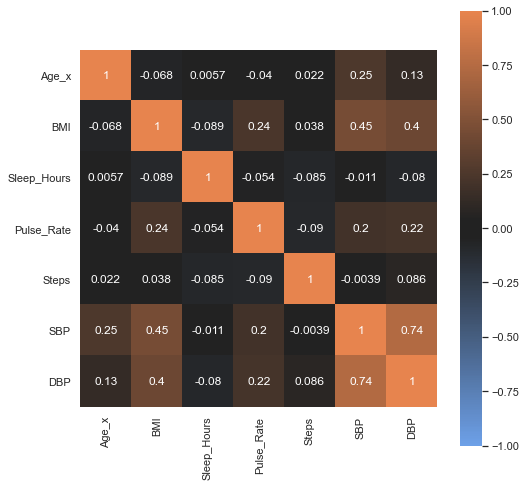

In [274]:
# Correlation of Tracker Data and Clinical Health Stats:

# BMI, AGE vs Blood Pressure Measurements

Tracker_Data = ['Age_x','BMI'] + Tracker_col

DATA = pd.concat([df_profiles_final[Tracker_Data],df_profiles_final[BP_col]],axis=1)

sns.set(rc={'figure.figsize':(8,8)})

CMAP = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True) # define the color scheme

sns.heatmap(DATA.corr(),vmin=-1.0,vmax=1.0,cmap=CMAP,annot=True, square=True)

plt.show()


From the above, Age, BMI and Pluse Rate, are all positively correlated to the increase of Blood Pressure (SBP and DBP). Of note, BMI is significantly correlated to SBP, at corr = 0.45

BMI had more positive correlations with the BP values. 

BMI also had a positive correlation with pulse rate.

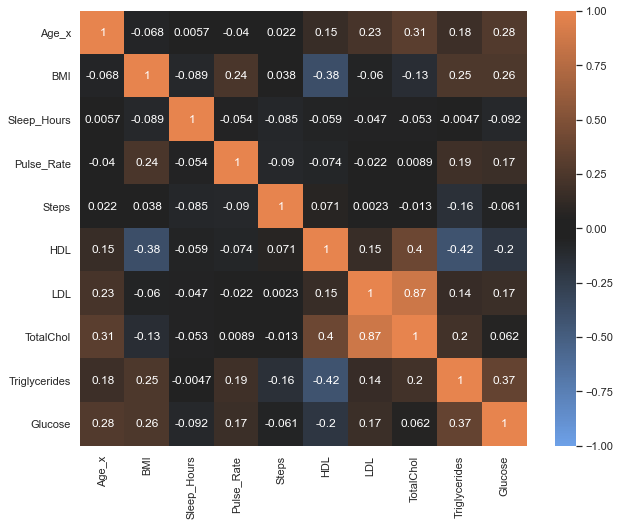

In [279]:
DATA = pd.concat([df_profiles_final[Tracker_Data],df_profiles_final[Cholestrol_col]],axis=1)

sns.set(rc={'figure.figsize':(10,8)})

CMAP = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

sns.heatmap(DATA.corr(),vmin=-1.0,vmax=1.0,cmap=CMAP,annot=True)

plt.show()


BMI is negatively correlated to HDL. 

Age is positively correlated to Cholestrol and Glucose values.

Pulse Rate is also corelated to Triglycerides and Glucose values.

### Saving into a CSV File for Backup

In [197]:
folder_path = os.path.join(current_directory,'Beyond fitness tracking, Weng et al, 2018 Feb 27')
file_name = 'Other_Source_Processed.csv'

df_profiles_final.to_csv(os.path.join(folder_path,file_name))